### ALUNO

**Nome: Vinicius Castellani Tonello, RA: 12325359**

### SOBRE A ATIVIDADE

#### TEMA
**Classificação da qualidade do vinho vermelho**

---

#### DESCRIÇÃO DO PROBLEMA

A qualidade de um vinho pode ser influenciada por diversos fatores químicos relacionados a sua produção, como acidez, teor alcoólico e compostos de enxofre, que influenciam e afetam diretamente seu sabor, aroma e equilíbrio. Ela é determinada por um equilíbrio entre suas propriedades físico-químicas. Embora a avaliação sensorial da qualidade seja subjetiva, sendo feita por degustação por especialistas, padrões químicos podem indicar vinhos de boa ou baixa qualidade.

**O objetivo dessa atividade** é desenvolver um modelo de classificação para prever a qualidade dos vinhos vermelhos vindo da variação do vinho português "Vinho Verde" com base em suas características químicas, identificando também as variáveis mais relevantes para a decisão.

---

#### DATASET UTILIZADO

Red Wine Quality.

**origem (link do dataset)**: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009?resource=download

---

#### PARÂMETROS UTILIZADOS

**inputs**
- **fixed acidity**: concentração de ácidos fixos. 
- **volatile acidity**: concentração de ácidos voláteis.
- **citric acid**: concentração de ácido cítrico.
- **residual sugar**: açúcar residual.
- **chlorides**: quantidade de cloretos. 
- **free sulfur dioxide**: dioxido sulfúrico livre (SO₂). 
- **total sulfur dioxide**: dioxido sulfúrico total (SO₂).
- **density**: densidade do vinho.
- **pH**: acidez do vinho.
- **sulphates**: concentração de sulfatos.
- **alcohol**: teor alcoólico.

**output**
- **quality**: qualidade, nota sensorial do vinho (originalmente valendo de **0 a 10**), transformada, posteriormente, em uma variável binária para classificação:
    - 1 = vinho classificado como **"bom" (nota >= 7)**.
    - 0 = vinho classificado como **"ruim" (nota < 7)**.

### IMPORTANDO BIBLIOTECAS

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

**EXPLICANDO O CÓDIGO**
- Neste trecho de código importamos as bibliotecas necessárias para esse projeto, como pandas, numpy, matplotlib, seaborn e sklearn utilizando as palavras "import" para trazer as bibliotecas e "from" para importar seus métodos específicos.

### IMPORTANDO O DATASET

In [3]:
qualidadeVinhoOriginalDf = pd.read_csv("winequality-red.csv")

qualidadeVinhoDf = qualidadeVinhoOriginalDf.copy()

qualidadeVinhoDf.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


**EXPLICANDO O CÓDIGO**
- Nesta parte do código, lemos o arquivo do conjunto de dados, que está no formato CSV, usando o método "read_csv", após isso fizemos uma cópia desse dataset usando o método "copy", e por fim mostramos as 10 primeiras linhas do dataset.

### VERIFICANDO VALORES VAZIOS

In [4]:
qualidadeVinhoDf.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**EXPLICANDO O CÓDIGO**
- Nesta linha de código, usamos o método "isNull", que retorna um novo dataframe contendo valores "False" se o valor a coluna do registro conter dados, e "True" se o valor da coluna não tiver dados, com esse conjunto de dados, usamos o método "sum", que soma os valores de cada coluna dos registros, sendo "False" valendo 0, e "True" valendo 1, que por fim, nos mostra quantos valores vazios cada coluna tem.

**INSIGHTS**
- Observamos, que a partir do resultado, não possuímos nenhum dado vazio em todas as colunas.

### VISUALIZANDO DISTRIBUIÇÃO DE QUALIDADE

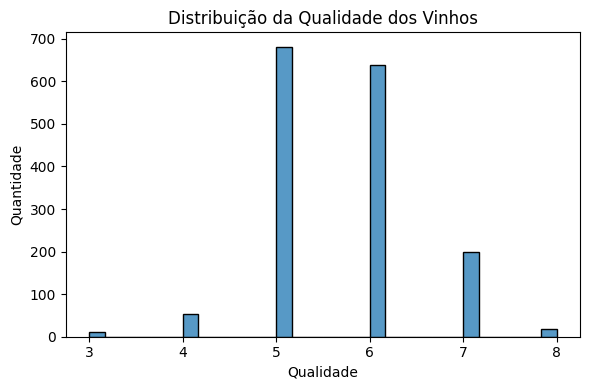

In [5]:
plt.figure(figsize=(6, 4))
sns.histplot(x='quality', data=qualidadeVinhoDf)
plt.title('Distribuição da Qualidade dos Vinhos')
plt.xlabel('Qualidade')
plt.ylabel('Quantidade')
plt.tight_layout()
plt.show()

**EXPLICANDO O CÓDIGO**
- Neste trecho de código, definimos o tamanho do gráfico usando o método "figure" junto com o parâmetro "figsize" com os valores de 6 polegadas na horizontal e 4 na vertical, depois isso criamos o histograma passando como parâmetro, o eixo X, que vamos usar a coluna "quality", e os dados no parâmetro "data" passando o nosso conjunto de dados, após isso definimos o título do gráfico usando o método "title", a legenda do eixo x, usando o parâmetro "xlabel", e do eixo y, usando o parâmetro "ylabel", por fim usamos o método "tight_layout" para ajustar as margens e rótulos dos eixos, e mostramos o gráfico usando "show".

**INSIGHTS DO GRÁFICO**
- Observando a distribuição da qualidade dos vinhos acima, revela uma maior quantidade de notas 5 e 6, o que indica que a maior parte dos vinhos possui qualidade mediana. Já os vinhos de boa qualidade, com notas 7 e 8, são menos frequentes, mas ainda possui bastante dados com essa nota, especialmente para a nota 7. Já os vinhos de baixa qualidade, com notas entre 3 e 4, são os que temos menos na amostra.

### TRANSFORMANDO A COLUNA "QUALITY" EM BINÁRIA

- "quality" >= 7 = 1 = "Bom"
- "quality" < 7 = 0 = "Ruim"

In [6]:
qualidadeVinhoDf['quality'] = qualidadeVinhoDf['quality'].apply(lambda x: 1 if x >= 7 else 0)
qualidadeVinhoDf.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


**EXPLICANDO O CÓDIGO**
- Nesta parte do código, mudamos o valor da coluna "qualidade" usando o método "apply" passando uma função anônima como parâmetro, usando o lambda, que recebe cada valor da coluna como "x", se o valor de "x" for maior ou igual a 7, a função retorna 1, indicando boa qualidade, se não retorna 0, indicando má qualidade, transformando o valor da coluna com o valor retornado. Por fim, mostramos as 10 primeiras linhas do dataset usando o método "head" passando 10 como parâmetro.

### ANALISANDO OS DADOS

In [7]:
qualidadeVinhoDf.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


**EXPLICANDO O CÓDIGO**
- Na linha de código acima, usamos o método "describe" para gerar um resumo estatístico de todas as colunas numéricas, contendo a quantidade de dados, a média, desvio padrão, valor mínimo, primeiro quartil, mediana, terceiro quartil e o valor máximo.

**INSIGHTS**
- A partir do resultado do método describe, podemos analisar essas conclusões sobre essas colunas
    - **fixed acidity (Acidez Fixa):** A maioria dos vinhos tem entre 7.1 e 9.2 de acidez fixa; a mediana (7.9) próxima da média (8.31) indica uma distribuição simétrica e sem viés, embora valores acima de 12 possam indicar excesso de acidez e possíveis outliers.  
    - **volatile acidity (Acidez Volátil):** Distribuição levemente assimétrica com valores entre 0.39–0.64 para a maioria dos casos, acima de 0.6 pode causar aromas indesejados, valores extremos sugerem observar outliers. 
    - **citric acid (Ácido Cítrico):** Distribuição relativamente simétrica, com média e mediana próximas; presença de valores nulos (zero) indica vinhos sem adição desse composto, o que pode impactar sabor e conservação.  
    - **residual sugar (Açúcar Residual):** Forte assimetria à direita; 75% dos vinhos são secos, menos de 2.6, mas há valores muito altos indicando possíveis vinhos doces ou outliers.
    - **chlorides (Cloretos):** Valores altamente concentrados até 0.09, mas com máximo em 0.611 indicando forte outlier possivelmente relacionado a erro de medição, contaminação ou vinho altamente salino.
    - **free sulfur dioxide (SO₂ Livre):** Distribuição com assimetria positiva; maioria dos valores concentrada até 21 mg/L, mas alguns extremos indicam a necessidade de controle rigoroso na produção.
    - **total sulfur dioxide (SO₂ Total):** Valores muito dispersos com pico em 289, indicando forte presença de outliers.  
    - **density (Densidade):** Variação extremamente pequena, com distribuição muito concentrada entre 0.995 e 1.0, sugerindo que a densidade é relativamente estável.
    - **pH:** Distribuição com leve assimetria; a maioria dos vinhos está na faixa ideal entre 3.2 e 3.4, o que contribui para estabilidade e acidez equilibrada.
    - **sulphates (Sulfatos):** Distribuição assimétrica com valores típicos abaixo de 0.73 (3º quartil), mas com valor máximo (2.0) bastante discrepante, sugerindo uso elevado de conservantes em alguns casos.
    - **alcohol (Álcool):** Distribuição próxima de normal, com média e mediana parecidas; maioria dos vinhos entre 9.5% e 11.6%, mas há alguns com teor alcoólico elevado, possivelmente vinhos fortificados.  
    - **quality (Qualidade):** Distribuição desbalanceada com 86.5% dos vinhos classificados como ruins e apenas 13.5% como bons.

##### ANALISANDO TIPOS DE DADOS DAS COLUNAS

In [8]:
qualidadeVinhoDf.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

**EXPLICANDO O CÓDIGO**
- Nesta linha do código, podemos verificar o tipo de dado das colunas no nosso conjunto de dados, usando o atributo "dtypes", que retorna o tipo de dados, sendo "float", número decimal, e "int" número inteiro.

**INSIGHTS**
- Observamos, que todas as colunas possuem o tipo de dado como "float", número decimal, e apenas a coluna "quality" possui o tipo de dado como "int", número inteiro.

##### VERIFICANDO DISTRIBUIÇÃO DOS DADOS PELA TARGET

In [9]:
qualidadeVinhoDf['quality'].value_counts().sort_index()

quality
0    1382
1     217
Name: count, dtype: int64

**EXPLICANDO O CÓDIGO**
- Nesta linha do código, selecionamos a coluna "quality" usando "qualidadeVinhoDf['quality']", após isso contamos quantas vezes o valor 0 e 1 aparecem na coluna, usando o método "value_counts", por fim, ordenamos o resultado com base no valor do índice em ordem crescente usando o método "sort_index". 

**INSIGHTS**
- Observamos pelo resultado, que possuímos a maior parte dos dados classificados como vinhos "ruins", possuindo o valor zero, com 1382 dados, e temos apenas 217 dados de vinhos "bons", tendo o valor 1.

##### ANALISANDO DISTRIBUIÇÃO DAS COLUNAS

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

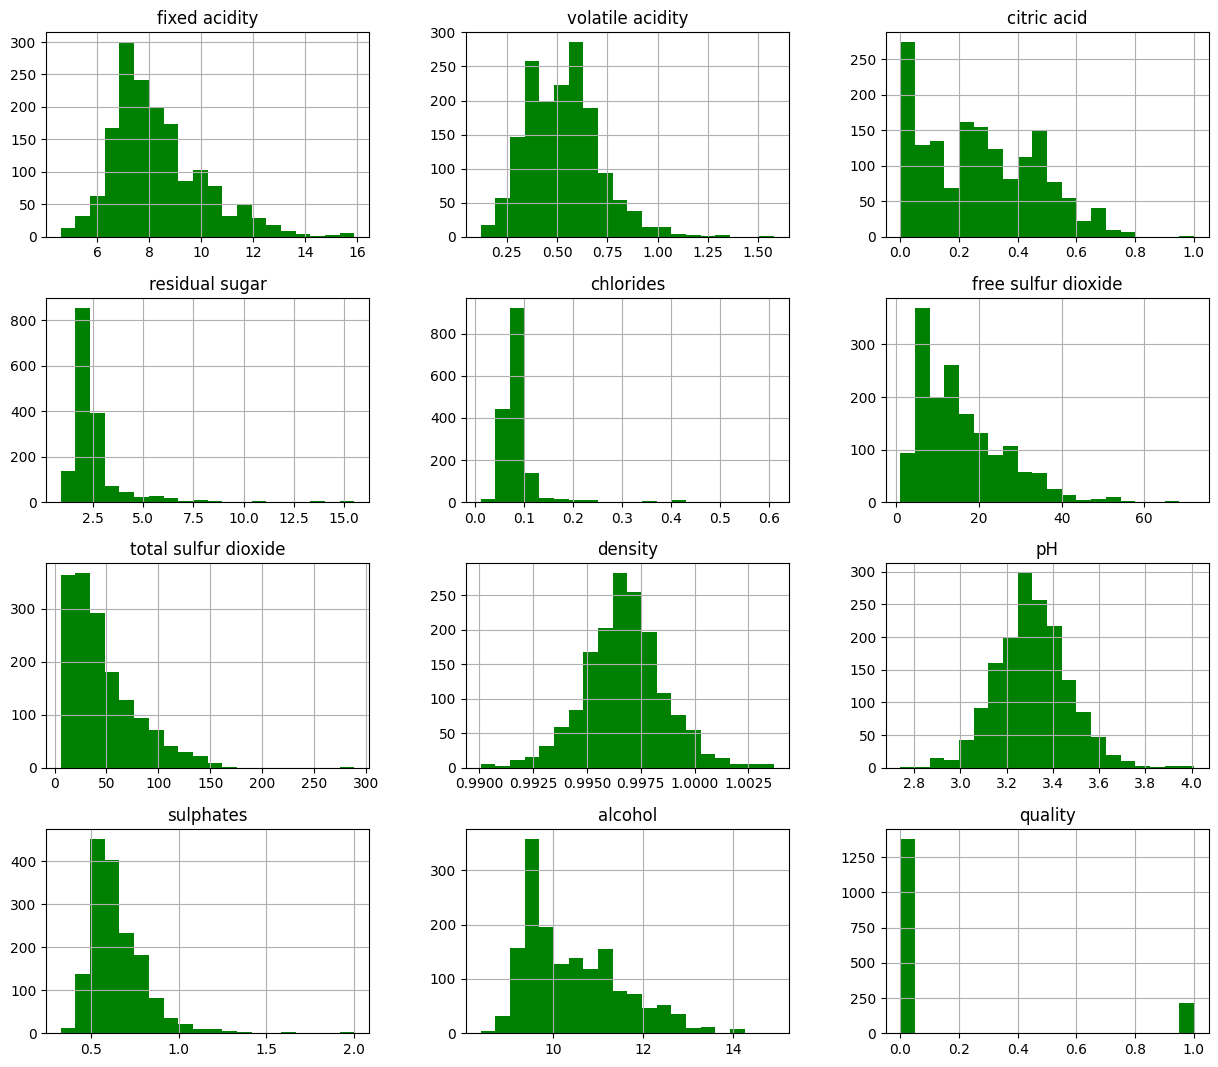

In [10]:
# DADOS EM GERAL

qualidadeVinhoDf.hist(bins = 20, figsize = (15,13), color = 'green')

**EXPLICANDO O CÓDIGO**
- No trecho do código acima, criamos um gráfico de histograma para todas as colunas usando o método "hist", passando o número de intervalos em que os dados serão divididos usando o parâmetro "bins", definimos o tamanho da figura fornecendo, em polegadas, o tamanho do eixo X, horizontal, e o tamanho do eixo Y, no eixo vertical, usando o parâmetro "figsize", por fim, definimos a cor do gráfico como verde, usando o parâmetro "color".

**INSIGHTS SOBRE OS GRÁFICOS**
- **fixed acidity (Acidez Fixa)**: A sua distribuição é assimétrica à direita, indicando que os dados estão se concentrando na parte esquerda da distribuição, sendo a maior parte entre 6 e 9, com valores maiores puxando a cauda para a direita.
- **volatile acidity (Acidez Volátil)**: A sua distribuição também é assimétrica a direita, tendo uma concentração de dados entre 0.3 e 0.6, com poucos valores puxando a cauda para direita.
- **citric acid (Ácido cítrico)**: A sua distribuição é levemente irregular, com picos múltiplos, com concentração de dados em 0 e entre 0.25 e 0.5.
- **residual sugar (Açúcar Residual)**: Temos uma grande assimetria, onde a grande, se não a maioria dos dados, estão concentrados entre 2 e 2.5, contendo outliers com valores acima de 8.
- **chlorides (Cloretos)**: Temos uma grande assimetria, onde a grande, se não a maioria dos dados, estão concentrados entre 0 e 0.1, contendo  outliers com valores acima de 0.2.
- **free sulfur dioxide (SO₂ Livre):** A sua distribuição é assimétrica à direita, contendo a maior parte da concentração dos dados entre 5 e 15, com valores maiores puxando a cauda para a direita, com presenças de outliers acima de 40.
- **total sulfur dioxide (SO₂ Total):** A sua distribuição é assimétrica à direita, contendo a maior parte da concentração dos dados entre 0 e 50, com valores maiores puxando a cauda para a direita, com presenças de poucos outliers acima de 150.
- **density (Densidade):** A sua distribuição é uma normal, indicando que a densidade é controlada, com uma concentração entre os valores 0.9950 e 1.000.
- **pH:** A sua distribuição é uma normal, indicando que a densidade é controlada, com uma concentração entre os valores 3.2 e 3.4.
- **sulphates (Sulfatos):** A sua distribuição é uma assimetria à direita, mesmo com a cauda curta, com uma concentração de valores entre 0.5 e 1, mas há valores acima do valore 1, puxando a cauda para a direita.
- **alcohol (Álcool):** A sua distribuição é uma assimetria à direita, com a concentração de valores entre 9 e 10, com valores acima de 10, puxando a cauda para a direita, com presença de alguns outliers com valores acima de 13.
- **quality (Qualidade)**: Percebemos que possuímos mais vinhos com a qualidade valendo 0, com mais de 1250 dados, do que os vinhos com a qualidade 1, com um pouco menos de 250 dados. 

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>, <Axes: >]], dtype=object)

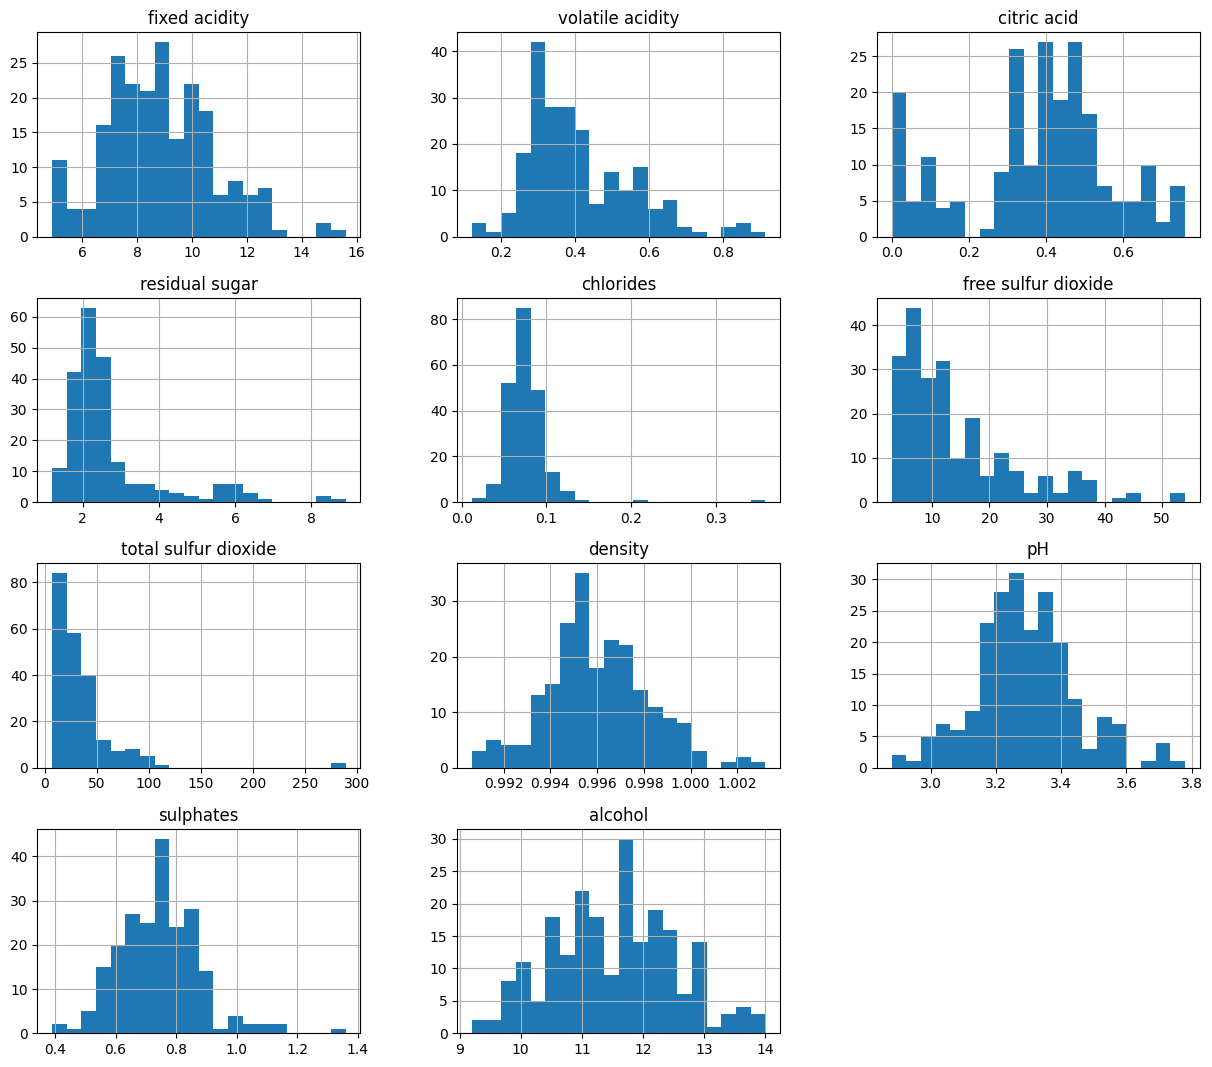

In [11]:
# APENAS DOS VINHOS BONS

vinhosBons = qualidadeVinhoDf[qualidadeVinhoDf['quality'] == 1]
vinhosBons = vinhosBons.drop('quality', axis = 1)

vinhosBons.hist(bins = 20, figsize = (15, 13))

**EXPLICANDO O CÓDIGO**
- No trecho do código acima, obtemos um dataset dos vinhos bons, com a qualidade valendo 1, usando uma filtragem no dataset onde fazemos "qualidadeVinhoDf['quality'] == 1", e depois removemos a coluna "quality", após isso criamos o gráfico de histograma para todas as colunas usando o método "hist", passando o número de intervalos em que os dados serão divididos usando o parâmetro "bins", definimos o tamanho da figura fornecendo, em polegadas, o tamanho do eixo X, horizontal, e o tamanho do eixo Y, no eixo vertical, usando o parâmetro "figsize", por fim, definimos a cor do gráfico como verde, usando o parâmetro "color".

**INSIGHTS SOBRE OS GRÁFICOS (VINHOS BONS)**
- **fixed acidity (Acidez Fixa)**: A distribuição continua assimétrica à direita, mas parece mais concentrada entre os valores 6.5 e 8.5, indicando menor dispersão e maior controle na acidez dos vinhos bons, com presença de outliers acima do valor 14.
- **volatile acidity (Acidez Volátil)**: Apresenta assimetria à direita, com maior concentração entre 0.25 e 0.4, com presenças de outliers acima de 0.7. Isso sugere que vinhos bons têm acidez volátil mais controlada, sem valores muito extremos.
- **citric acid (Ácido Cítrico)**: A distribuição mostra picos entre 0.3 e 0.45, com menos variabilidade do que nos vinhos ruins. Há uma leve assimetria à esquerda, sugerindo que vinhos bons tendem a ter mais ácido cítrico.
- **residual sugar (Açúcar Residual)**: A distribuição é altamente assimétrica à direita, com a maior parte dos dados entre 1 e 2.5, porém com outlier com valor acima de 8. Vinhos bons parecem ter menos açúcar residual em geral.
- **chlorides (Cloretos)**: A maioria dos dados está entre 0.04 e 0.08, com alguns outliers acima de 0.1. Isso indica baixa presença de cloretos nos vinhos bons.
- **free sulfur dioxide (SO₂ Livre):** Distribuição assimétrica à direita, com valores concentrados entre 5 e 20. Os vinhos bons tendem a ter uma faixa segura de SO₂ livre, com outliers acima de 40.
- **total sulfur dioxide (SO₂ Total):** A distribuição segue assimétrica à direita, mas com concentração entre 0 e 100 e com presença de outlier acima do valor 200, com alguns valores acima de 150, indicando controle no uso de conservantes.
- **density (Densidade):** Distribuição bem centrada, normal, com leve formato de sino, com a concentração de dados entre 0.994 e 0.998 e com outliers acima de 1.000. Vinhos bons possuem densidade mais estável e dentro de uma faixa ideal.
- **pH:** Distribuição normal, centrada entre 3.2 e 3.4. Isso indica um bom equilíbrio ácido-base nos vinhos de maior qualidade.
- **sulphates (Sulfatos):** Assimetria à direita, com concentração entre 0.5 e 0.8, com outliers acima de 1.
- **alcohol (Álcool):** A distribuição mostra um deslocamento para a direita, quase uma normal, com concentração entre 11 e 13. Isso indica que vinhos bons tendem a ter maior teor alcoólico.

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>, <Axes: >]], dtype=object)

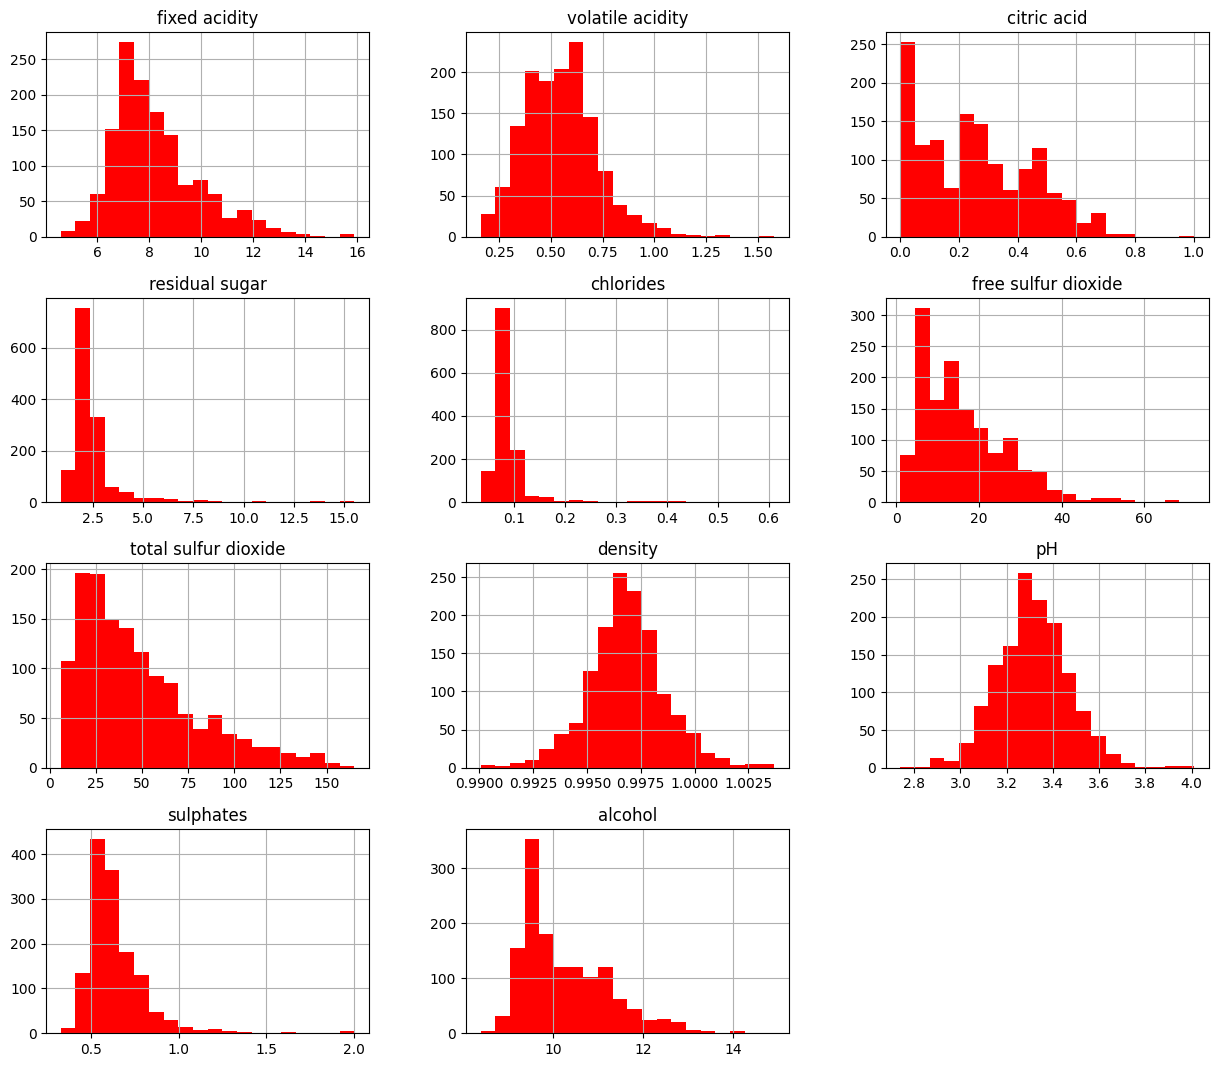

In [12]:
# APENAS DOS VINHOS RUINS

vinhosRuins = qualidadeVinhoDf[qualidadeVinhoDf['quality'] == 0]
vinhosRuins = vinhosRuins.drop('quality', axis = 1)

vinhosRuins.hist(bins = 20, figsize = (15, 13), color = 'red')

**EXPLICANDO O CÓDIGO**
- No trecho do código acima, obtemos um dataset dos vinhos ruins, com a qualidade valendo 0, usando uma filtragem no dataset onde fazemos "qualidadeVinhoDf['quality'] == 0", e depois removemos a coluna "quality", após isso criamos o gráfico de histograma para todas as colunas usando o método "hist", passando o número de intervalos em que os dados serão divididos usando o parâmetro "bins", definimos o tamanho da figura fornecendo, em polegadas, o tamanho do eixo X, horizontal, e o tamanho do eixo Y, no eixo vertical, usando o parâmetro "figsize", por fim, definimos a cor do gráfico como vermelho, usando o parâmetro "color".

**INSIGHTS SOBRE OS GRÁFICOS (VINHOS RUINS)**
- **fixed acidity (Acidez Fixa)**: Distribuição assimétrica à direita, com maior concentração entre 6 e 8.5, com presença de outliers acima de 15, indicando que alguns vinhos apresentam níveis muito altos de acidez fixa.
- **volatile acidity (Acidez Volátil)**: A distribuição é assimétrica à direita, concentrando-se entre 0.4 e 0.7 coma presença de outliers acima de 1,  sugerindo que vinhos ruins tendem a ter acidez volátil elevada, o que pode gerar aromas desagradáveis.
- **citric acid (Ácido Cítrico)**: Valores concentrados no valor 0, com assimetria à direita, isso sugere que muitos vinhos ruins têm baixa acidez cítrica, o que pode deixar o vinho sem frescor ou complexidade.
- **residual sugar (Açúcar Residual)**: Distribuição muito concentrado entre 2 e 2.5, mas com outliers chegando até 15. Embora poucos vinhos tenham altos níveis de açúcar residual, isso pode impactar negativamente o equilíbrio do vinho se não estiver bem ajustado com a acidez.
- **chlorides (Cloretos)**: Distribuição altamente concentrada entre 0.05 e 0.1, com alguns outliers acima de 0.1, cloretos em excesso podem indicar salinidade elevada, afetando o sabor e a qualidade percebida.
- **free sulfur dioxide (SO₂ Livre):** Distribuição assimétrica à direita com pico entre 5 e 15, com presença de outliers acima de 40, níveis muito altos ou baixos de SO₂ livre podem indicar má conservação ou desequilíbrio químico.
- **total sulfur dioxide (SO₂ Total):** A distribuição segue assimétrica à direita, mas com concentração entre 0 e 30, e com valores maiores, puxando a cauda para a direita, indicando que vinhos ruins tendem a ter alta carga de conservantes, o que pode impactar o aroma.
- **density (Densidade):** Distribuição bastante simétrica, normal, com concentração de valores entre 0.9950 e 1, isso sugere uma boa estabilidade.
- **pH:** Distribuição normal, com uma concentração maior dos dados entre 3.2 e 3.4.
- **sulphates (Sulfatos):** A maioria dos dados está concentrado entre 0.5 e 0.6, com outliers acima do valor 1, sugerem presença de compostos que afetam a preservação, mas valores muito altos podem indicar adição excessiva.
- **alcohol (Álcool):** Distribuição com pico claro entre 9 e 10.5, com presença de outliers acima de 12, vinhos ruins geralmente têm menor teor alcoólico. 

##### COMPARANDO AS COLUNAS PELA "QUALIDADE" GRAFICAMENTE

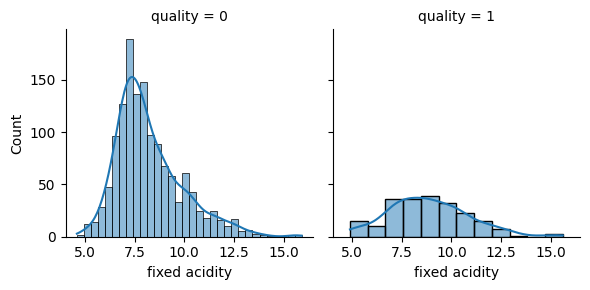

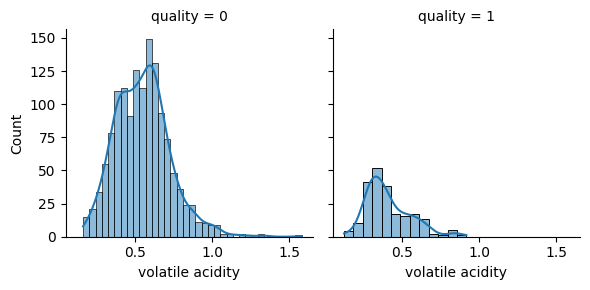

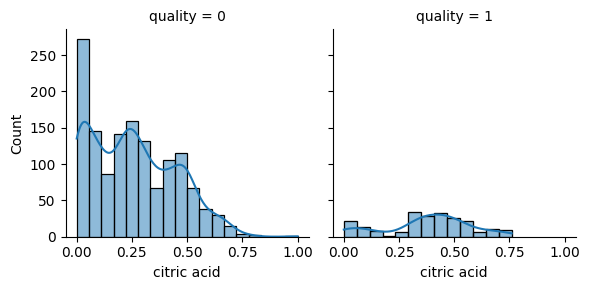

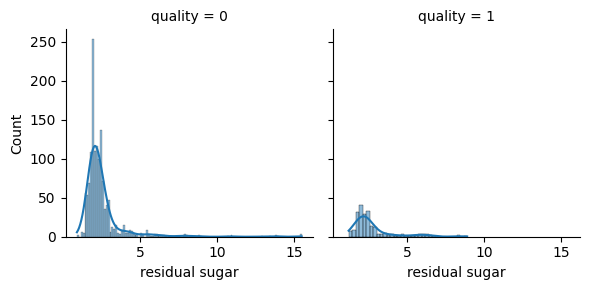

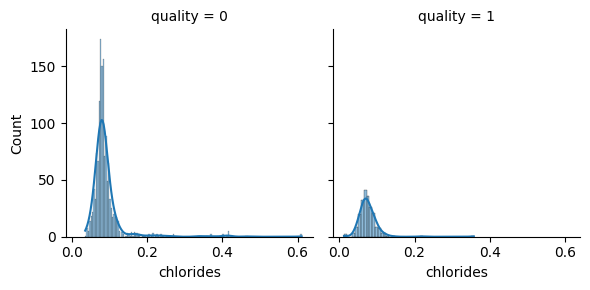

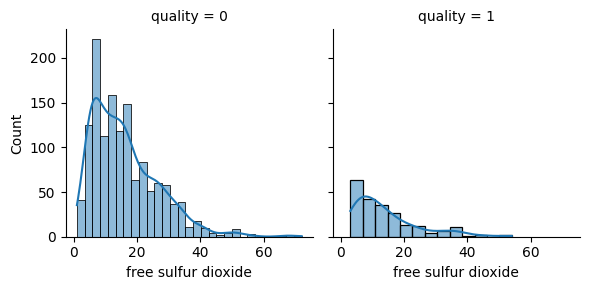

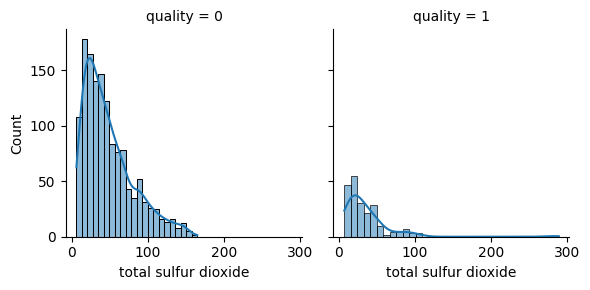

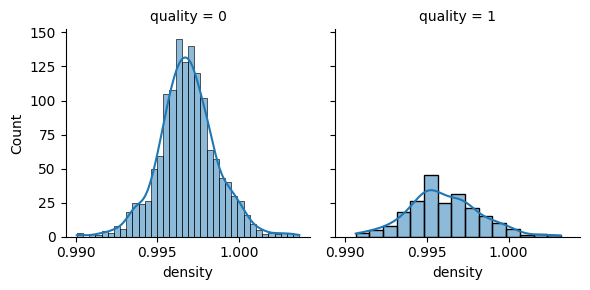

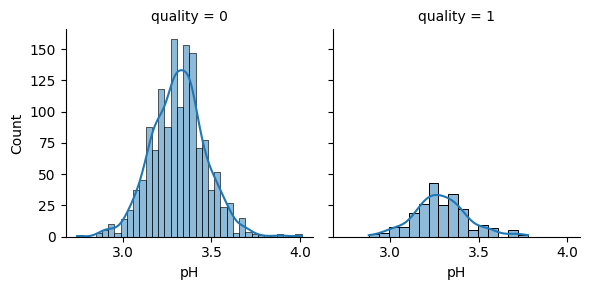

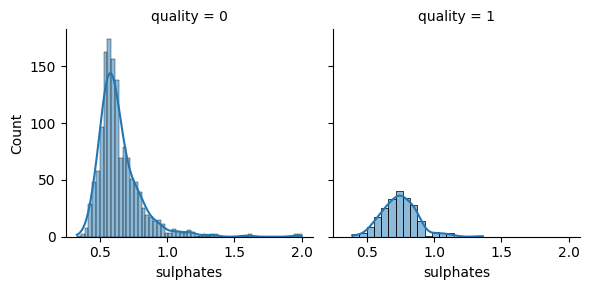

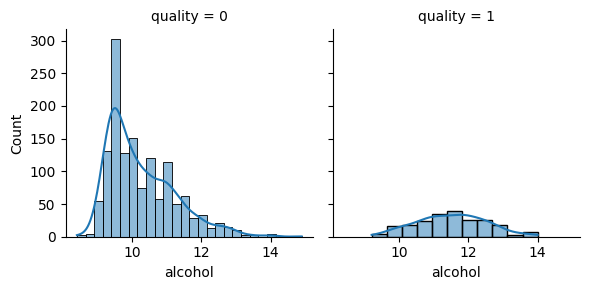

In [13]:
colunas = qualidadeVinhoDf.drop(columns='quality').columns

for coluna in colunas:
    g = sns.FacetGrid(qualidadeVinhoDf, col='quality')
    g.map(sns.histplot, coluna, kde=True)  
    plt.show()

**EXPLICANDO O CÓDIGO**
- No trecho do código acima, selecionamos todas as colunas exceto a coluna "quality" utilizando o método "drop", após isso, percorremos um loop onde obtemos a cada iteração uma coluna da lista de colunas usando "for", após isso criamos uma grade de gráficos, os separando pela coluna "quality" usando o método "FacetGrid" e passando como parâmetros o nosso conjunto de dados e a coluna que queremos separar, que é a "quality", utilizando o parâmetro “col”, tendo um gráfico para os vinhos ruins, no lado esquerdo, com o valor da qualidade igual a 0, e um para os vinhos bons, no lado direito com o valor da qualidade igual a 1, além disso, criamos o nosso gráfico de histograma com a curva de densidade, usando o método "map", para a coluna atual no loop, passando como parâmetro o tipo do gráfico, "sns.histplot", a coluna atual, e o parâmetro "kde" como "True", para mostrar a curva de densidade. Por fim, mostramos os gráficos via método "show".

**INSIGHTS DOS GRÁFICOS**
- **fixed acidity (acidez fixa):** Para vinhos ruins, quality = 0, a distribuição é assimétrica à direita, com concentração entre 6.5 e 8.5, e uma cauda estendida indicando outliers acima de 12. Já nos vinhos bons, quality = 1, a distribuição é mais equilibrada e espalhada, variando de 6 até 11, sem grande pico, porém com uma concentração entre 7.5 e 10, sugerindo que uma acidez fixa mais moderada e diversificada pode estar associada à melhor qualidade.
- **volatile acidity (acidez volátil):** Para vinhos ruins, quality = 0, a distribuição é fortemente assimétrica à direita, com maior concentração entre 0.45 e 0.65, e cauda longa até valores superiores a 1.0. Já os vinhos bons apresentam uma distribuição mais concentrada entre 0.3 e 0.5 porém com uma assimetria à direita, com valores máximos menores e menos outliers, indicando que menor acidez volátil está associada a vinhos de maior qualidade, provavelmente por evitar sabores e aromas desagradáveis.
- **citric acid (ácido cítrico):** Para os vinhos ruins, quality = 0, a distribuição mostra que muitos vinhos têm baixa concentração de ácido cítrico com concentração no valor 0, com uma cauda indo até 1.0, indicando outliers. Já nos vinhos bons, quality = 1, embora a amostra seja menor, a distribuição é mais uniforme e levemente concentrada entre 0.3 e 0.5, sugerindo que níveis moderados de ácido cítrico podem estar associados a uma melhor qualidade do vinho, possivelmente contribuindo para equilíbrio na acidez.
- **residual sugar (açúcar residual):** Para os vinhos ruins, quality = 0, a sua distribuição é assimétrica à direita, há um grande pico concentrado entre os valores 0 a 0.2, porém com uma cauda longa com presença de outliers acima de 0.3. Já nos vinhos bons, quality = 1, há uma concentração entre 0 e 0.2 com poucos valores altos, indicando que vinhos bons tendem a ter baixa quantidade de açúcar residual, o que pode indicar um processo de fermentação mais completo e equilibrado.
- **chrolides (cloretos):** Em vinhos de baixa qualidade, quality = 0, a maioria das amostras tem concentração entre 0 e 0.1, mas há uma cauda longa após o valor 0.2, indicando presença de outliers e também indicando que níveis mais altos de cloretos estão presentes em alguns vinhos ruins. Já nos vinhos bons, quality = 1, a concentração de cloretos é mais concentrada e simétrica, com a maioria dos valores abaixo de 0.1, também com uma cauda após o valor 0.2, isso sugere que teores muito altos de cloretos podem estar associados à perda de qualidade, talvez por impactar negativamente no sabor ou na conservação do vinho.
- **free sulfur dioxide (dióxido de enxofre livre):** A distribuição em vinhos ruins é bastante assimétrica, com pico entre 5 e 18 e uma cauda longa até acima de 40, indicando muitos valores extremos e outliers. Em vinhos bons, a concentração tende a se concentrar entre 5 e 20, mas com menos variações extremas, porém também com uma cauda acima de 40. Isso pode indicar que níveis moderados de dióxido de enxofre livre são desejáveis para preservar o vinho sem afetar negativamente sua qualidade, enquanto valores muito altos podem ser prejudiciais.
- **total sulfur dioxide (dióxido de enxofre total):** Vinhos com qualidade baixa, quality = 0, apresentam uma distribuição mais ampla, com muitos casos concentrando entre 0 e 50, com uma assimetria a direita indo até o valor 160, isso indica o uso elevado de conservantes e sugere que valores excessivos podem estar associados à pior qualidade do vinho, possivelmente por afetar sabor, aroma ou causar reações químicas indesejadas. Já nos vinhos com qualidade alta, quality = 1, os valores são mais concentrados em torno de 0 a 20, com presença de outliers acima de 100.
- **density (densidade):** Ambos os grupos têm distribuições concentradas entre 0.995 e 1.000, porém, nos vinhos bons, possuí menos variação e um pico mais definido. Isso pode indicar que vinhos de melhor qualidade tendem a ter densidade mais consistente, o que pode estar relacionado ao equilíbrio entre açúcar, álcool e outros componentes.
- **ph:** Ambos os grupos têm distribuições concentradas entre 3.2 e 3.5, porém nos vinhos bons, quality = 1, temos menos variação e mais concentração, sugerindo que vinhos bons tendem a ter ph mais baixo.
- **sulphates (sulfatos):** Em vinhos ruins, quality = 0, a maioria dos valores está entre 0.5 e 0.7, com uma cauda longa à direita após o valor 1 indo até o valor 2, indicando presença de outliers, já nos vinhos bons, quality = 1, a distribuição é mais centrada em torno de 0.6 e 0.8, com maior simetria e menos valores extremos, com alguns outliers acima do valor 1, isso sugere que vinhos de qualidade superior tendem a conter quantidades moderadas e mais consistentes de sulfatos, o que pode contribuir para uma melhor conservação sem prejudicar o sabor.
- **alcohol (álcool):** Em vinhos de qualidade ruím, quality = 0, a maior concentração de dados está entre 9 e 10, com uma asssimetria à direita, contendo outliers acima de 13. Já nos vinhos bons, quality = 1, a distribuição é mais simétrica e está concentrada entre 11 e 13, isso indica que vinhos de qualidade superior tendem a ter teor alcoólico mais elevado, com média entre 11 e 13, enquanto vinhos ruins estão mais concentrados abaixo de 11.

##### AGRUPANDO COLUNAS PELA QUALIDADE

In [14]:
medianaPorQualidade = qualidadeVinhoDf.groupby('quality').median()
medianaPorQualidade

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
0,7.8,0.54,0.24,2.2,0.080,14.0,39.5,0.99680,3.31,0.60,10.0
1,8.7,0.37,0.40,2.3,0.073,11.0,27.0,0.99572,3.27,0.74,11.6


**EXPLICANDO O CÓDIGO**
- No trecho do código acima, agrupamos os registros, dados, dos vinhos pela qualidade usando o método "groupby" os transformando em subconjuntos, após o agrupamento, calculamos a mediana de cada coluna dos dados agrupados utilizando o método "median", tendo como resultado uma tabela, por fim, mostramos essa tabela, apenas escrevendo o seu nome "medianaPorQualidade".

**INSIGHTS**
- Com base na mediana dos atributos químicos por qualidade, observa-se que vinhos de melhor qualidade, com valor 1, possuem maior acidez fixa, ácido cítrico, sulfatos e teor alcoólico, além de menor acidez volátil, cloretos, dióxido de enxofre, tanto livre quanto total, e densidade em comparação aos de menor qualidade, com valor 0. Em suma, a qualidade tende a aumentar com o álcool, ácido cítrico e sulfatos, enquanto diminui com acidez volátil, dióxido de enxofre total e densidade, indicando que vinhos mais equilibrados e com menor presença de conservantes costumam ser melhor avaliados.

##### VERIFICANDO CORRELAÇÃO ENTRE AS COLUNAS

In [15]:
correlacao = qualidadeVinhoDf.corr(method='pearson')
correlacao

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.120061
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.270712
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.214716
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.047779
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.097308
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.071747
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.139517
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.150460
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057283
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.199485


**EXPLICANDO O CÓDIGO**
- Na parte do código acima, calculamos a correlação entre as colunas numéricas usando o método "corr", passando como parâmetros o tipo de correlação, que na qual usamos "pearson" onde mede a relação linear variando entre -1 e 1, onde -1 indica correlação negativa, quando uma coluna aumenta a outra diminui, vice versa, 0, indicando que não há correlação entre as colunas, e 1, sendo correlação positiva, quando uma coluna aumenta a outra também aumenta.

<Axes: >

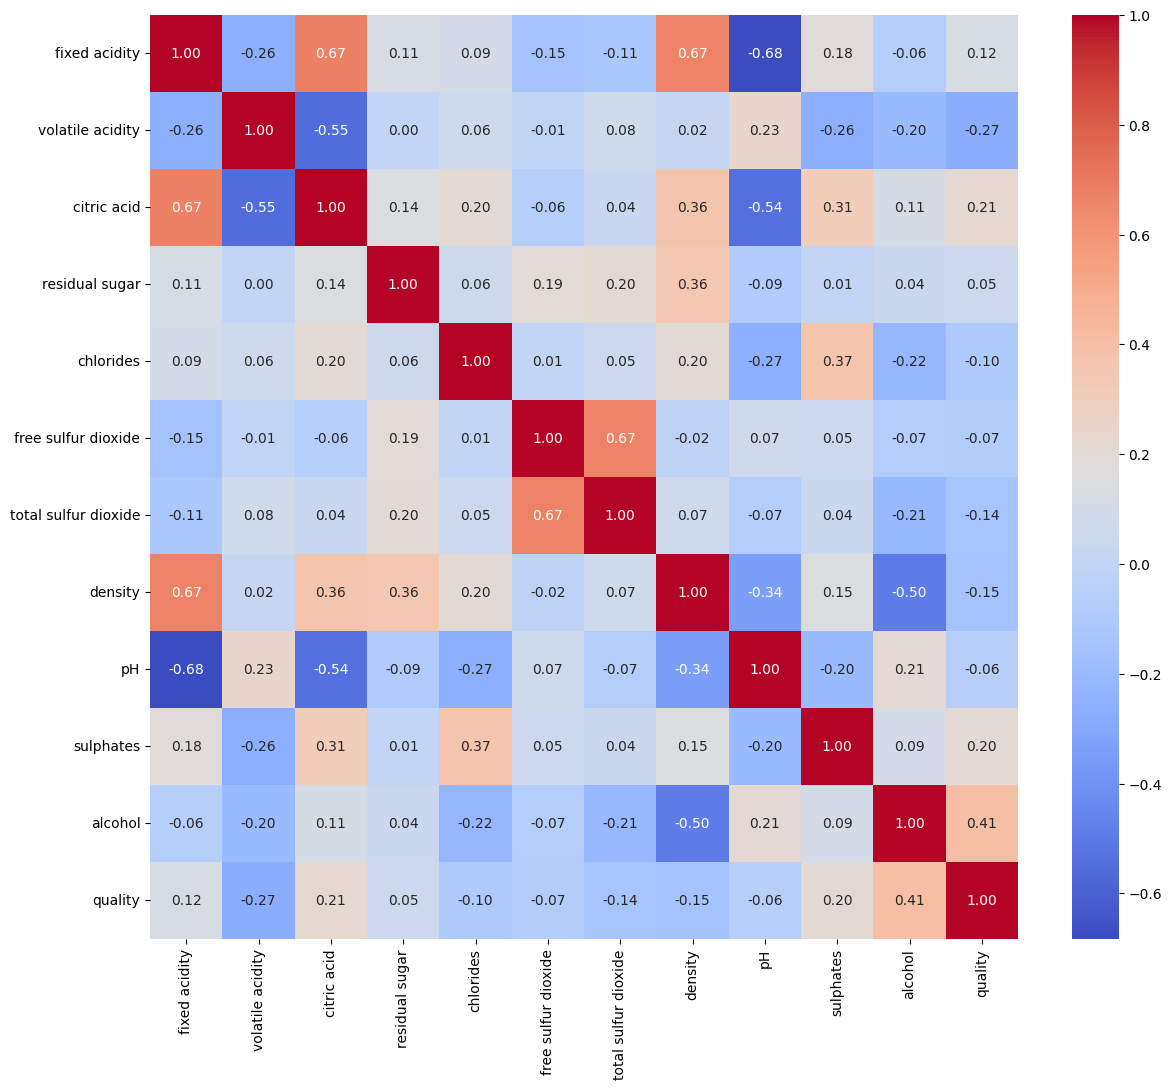

In [16]:
plt.figure(figsize=(14, 12))
sns.heatmap(correlacao, cmap = 'coolwarm', fmt = '.2f', vmax = 1.0, annot = True)

**EXPLICANDO O CÓDIGO**
- Neste trecho de código, definimos o tamanho da figura com 14 polegadas na largura e 12 polegadas na altura usando o método "figure", após isso, criamos um mapa de calor utilizando o método "heatmap", passando como parâmetro a tabela de correlação criada anteriormente, a escala de cores como "coolwarm" no parâmetro "cmap", onde o azul representa os valores negativos e o vermelho os positivos, a formatação dos números em 2 casas decimais no parâmetro "fmt", que utilizamos '.2f', o valor máximo da escala de cores como 1 no parâmetro "vmax" e por fim mostramos os valores numéricos dentro de cada bloco no gráfico usando o parâmetro "annot" como "True".

**INSIGHTS DO GRÁFICO**
- A matriz de correlação mostra que a variável mais associada positivamente à qualidade do vinho é o teor alcoólico, com correlação de 0.41, indicando que vinhos com maior teor de álcool tendem a ter melhor avaliação. Também há correlações positivas mais fracas com os níveis de sulfatos, correlação de 0.20 e ácido cítrico 0.21, sugerindo que esses compostos podem contribuir de forma moderada para a percepção de qualidade. Por outro lado, há correlação negativa com a acidez volátil, com correlação de -0.27, cloretos com -0.10, dióxido de enxofre total com -0.14 e densidade com -0.15, apontando que vinhos com maior presença desses elementos tendem a ter qualidade inferior. Esses dados indicam que vinhos considerados de melhor qualidade geralmente são mais alcoólicos, menos densos, com menor acidez volátil e menor concentração de conservantes como o dióxido de enxofre.

### TREINANDO MODELO DE PREDICAO

##### SEPARANDO OS DADOS PARA TREINO E TESTE

In [17]:
features = qualidadeVinhoDf.drop('quality', axis = 1)
alvo =  qualidadeVinhoDf['quality'] 

xTreino, xTeste, yTreino, yTeste = train_test_split(features, alvo, test_size = 0.3, random_state = 42)

**EXPLICANDO O CÓDIGO**
- Nesta parte do código, armazenamos na variável "features" todas as colunas exceto a coluna "quality", fazemos isso removendo a coluna "quality" usando o método "drop" com o parâmetro "axis" valendo 1, para remover coluna e não linha, depois armazenamos na variável "alvo" apenas a coluna "quality", aquilo que queremos prever, selecionando essa coluna no dataset usando "['quality']". Após tudo isso, dividimos os dados em "treino" e "teste" usando o método "train_test_split", para dividir os dados aleatoriamente, passamos como parâmetro as variáveis "features" e "alvo", definimos a porcentagem, tamanho, dos dados de teste no parâmetro "test_size", que usamos 0.3, 30%, com isso 70% dos dados vão ser usados para treino, e por fim, definimos no parâmetro "random_state" o valor 42, que garante que a separação seja sempre igual se rodarmos o código novamente.

##### TREINANDO MODELO DE REGRESSÃO LOGÍSTICA

In [18]:
modeloRegressaoLogistica = LogisticRegression(solver = 'liblinear')
modeloRegressaoLogistica.fit(xTreino, yTreino)

predicaoRegressao = modeloRegressaoLogistica.predict(xTeste)

acuracia = accuracy_score(yTeste, predicaoRegressao)
print(f"Nível de acurácia: {acuracia}")

Nível de acurácia: 0.8666666666666667


**EXPLICANDO COMO FUNCIONA A REGRESSÃO LOGÍSTICA**
- A regressão logística é usada para classificação de dados, idealmente utilizada para prever valores binários, ela calcula uma função linear dos atributos, aplicando uma função sigmoide, logística, que é "S(x) = 1 / 1 + e^-x", ao resultado, transformando o valor em uma probabilidade entre 0 e 1, onde se a probabilidade for maior ou igual a 0.5, a classe prevista é 1, se não, é prevista como 0.

**EXPLICANDO O CÓDIGO**
- Neste trecho de código, criamos o modelo de regressão logística utilizamos o método "liblinear" para ajustar o modelo aos dados, sendo responsável por encontrar os melhores valores para que o modelo consiga aprender e fazer boas previsões. Após isso, treinamos o modelo de regressão linear usando o método "fit" passando como parâmetro os nossos dados de entrada, "xTreino", e o que queremos prever, "yTreino". Depois disso, fazemos previsões com os dados de teste, "xTeste", utilizando o método "predict", além do mais, medimos a acurácia destas previsões, as comparando com os rótulos de classificações reais, 0 ou 1, usando o método "accuracy_score", passando como parâmetro os dados para teste, "yTeste", e as previsões feitas no método "predict", "predicaoRegressao", por fim, mostramos o resultado da acurácia via método "print".

##### TREINANDO MODELO DE ÁRVORE DECISÃO

In [19]:
modeloArvore = DecisionTreeClassifier(max_depth = 5, criterion = "entropy")
modeloArvore.fit(xTreino, yTreino)

predicaoArvore = modeloArvore.predict(xTeste)

acuracia = accuracy_score(yTeste, predicaoArvore)
print(f"Nível de acurácia: {acuracia}")

Nível de acurácia: 0.875


**EXPLICANDO COMO FUNCIONA A ÁRVORE DE DECISÃO**
- A árvore de classificação que usa entropia como critério, funciona dividindo os dados em etapas, onde cada divisão, nó, é escolhida com base na redução da entropia, que é uma medida da impureza dos dados em um conjunto e que tem como objetivo medir o "nível de bagunça" dos dados no ponto da árvore e reduzir essa bagunça a cada divisão, quanto mais misturadas estiverem as classes, por exemplo, dados com vinhos "ruins" e "bons" no mesmo grupo, maior é a entropia. A cada divisão, a árvore vê qual atributo, ou coluna, que mais reduz a entropia e segue dividindo até chegar a um limite ou até os grupos possuírem uma entropia muito próximo de 0, no final da árvore, cada "nó" representa a classificação final dos dados.

**EXPLICANDO O CÓDIGO**
- No trecho do código acima, criamos um modelo de árvore de classificação usando a classe "DecisionTreeClassifier", com no máximo 5 níveis, ou seja profundidade valendo 5, usando o parâmetro "max_depth" passando como valor, 5, e usamos a entropia como medida de impureza, usando o parâmetro "criterion" com valor "entropy". Após isso, treinamos o modelo da árvore usando o método "fit" passando como parâmetro o "xTreino", dados de entrada, e "yTreino" definidos anteriormente, o que queremos prever. Depois disso, fazemos previsões com os dados de teste, "xTeste", utilizando o método "predict", além do mais, medimos a acurácia destas previsões, comparando elas com os rótulos reais, 0 ou 1, usando o método "accuracy_score", passando como parâmetro o "yTeste", dados para teste, e "predicaoArvore", as previsões feitas no método "predict", por fim, mostramos o resultado da acurácia via método "print".

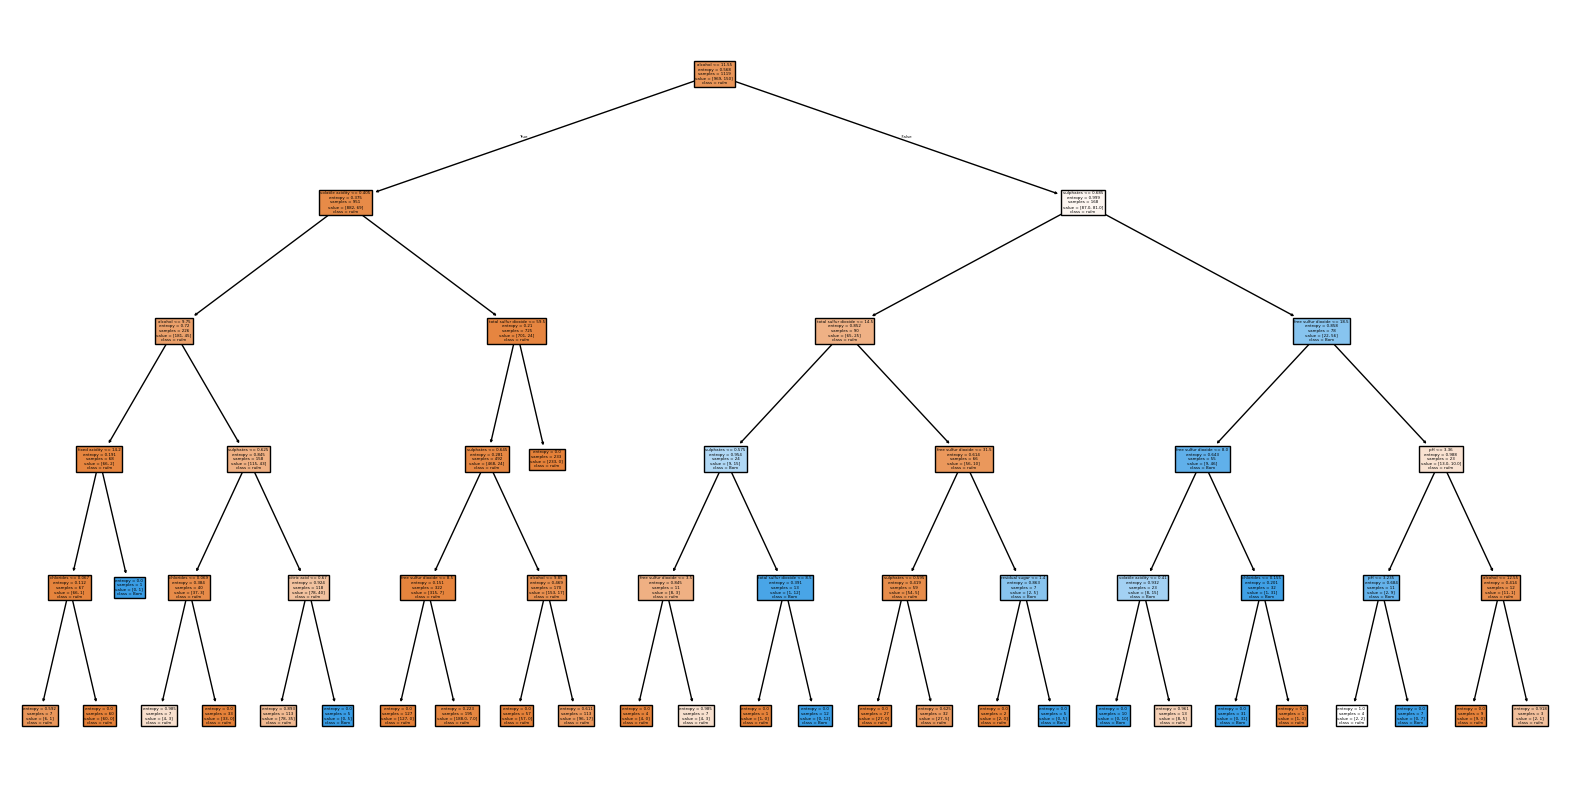

In [20]:
plt.figure(figsize = (20, 10))

arvore = tree.plot_tree(modeloArvore, feature_names = features.columns, class_names = ["ruím", "Bom"], filled=True) # type: ignore

**EXPLICANDO O CÓDIGO**
- Neste trecho de código, definimos o tamanho da figura com 20 polegadas na largura e 10 polegadas na altura usando o método "figure", criamos um desenho da árvore de decisão usamos o método "plot_tree", passando nos parâmetros o nosso modelo de árvore, nome das colunas utilizadas na árvore passando "features.columns" no parâmetro "feature_names", o rótulo das classes, podendo ser classificados com "ruím" ou "Bom", passando uma lista com essas classificações no parâmetro "class_names" e por fim, usamos o parâmetro "filled" com valor "True" para preencher cada nó com cores para destacar e indicar as classes.

**INSIGHTS**
- Percebemos, ao analisar a árvore, que possuímos mais classificações de vinhos "ruins", caracterizado pela cor vermelha, do que os vinhos "bons", caracterizados pela cor azul, pois como temos mais dados de vinhos "ruins", a árvore fica desbalanceada.

##### VISUALIZANDO O NÍVEL DE IMPORTÂNCIA DAS COLUNAS

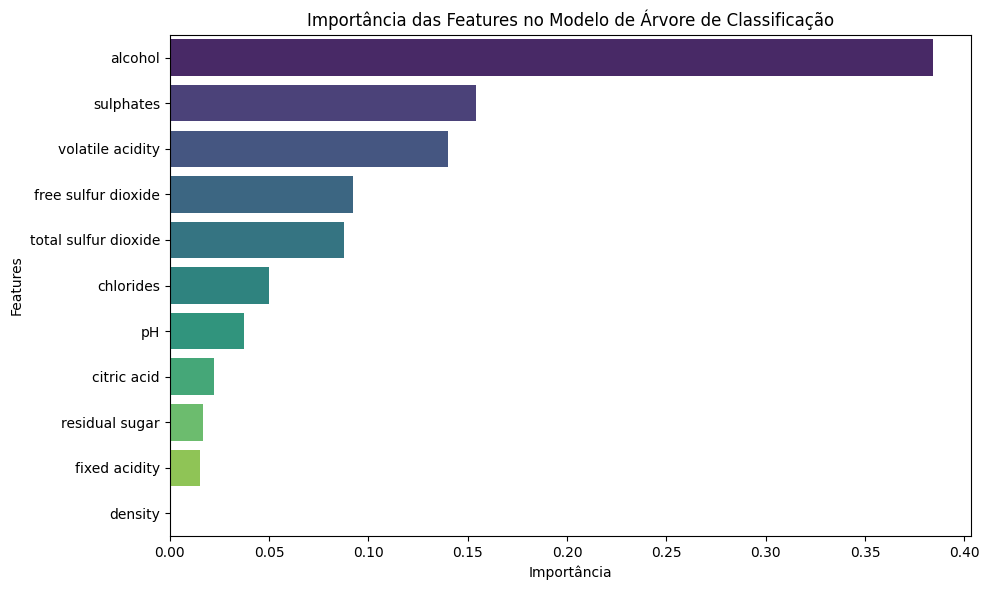

In [21]:
importancias = modeloArvore.feature_importances_
nomeColunas = features.columns

importanciaDf = pd.DataFrame({'Feature': nomeColunas,'Importancia': importancias}).sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x = 'Importancia', y = 'Feature', data = importanciaDf, hue = nomeColunas, palette = 'viridis', legend = False)
plt.title('Importância das Features no Modelo de Árvore de Classificação')
plt.xlabel('Importância')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

**EXPLICANDO O CÓDIGO**
- Neste trecho do código, extraímos a importância das colunas, ou seja, uma lista com os pesos de cada coluna onde, quanto maior o valor, mais relevante a variável foi para o modelo. Depois disso, obtemos os nomes das colunas acessando o atributo "columns". Com tudo isso, criamos um conjunto de dados com duas colunas, sendo a primeira as "features" e a segunda a "Importancia", que obtermos anteriormente, ordenamos esse dataframe a partir da coluna "Importancia" usando o método "sort_values" e também os parâmetros: "by", passando como nome da coluna que queremos ordenar por, e o parâmetro "ascending" como "False", para tornar a ordenação decrescente. Após construir esse dataframe, o visualizamos com gráfico de barras, definimos o tamanho da figura com 20 polegadas na largura e 10 polegadas na altura usando o método "figure", e geramos um gráfico de barras usando o método "barplot", onde passamos como parâmetros o eixo X, usando o parâmetro "x", o eixo Y, utilizando o parâmetro "y", o nosso conjunto de dados no parâmetro "data", definimos cores diferentes para cada feature, usando o parâmetro "hue" e passando como valor a variável "nomeColunas", definimos o esquema de cores no parâmetro "palette" e removemos a legenda definindo o parâmetro "legend" como "False". Por fim, definimos o título do gráfico usando o método "title", o nome do eixo X usando "xLabel" e Y usando "yLabel", ajustamos automático para evitar cortes utilizando "tight_layout" e mostramos o gráfico usando "show".

**INSIGHTS DO GRÁFICO**
- O gráfico mostra a importância das features, colunas, ou seja, quanto cada variável contribui para a divisão dos nós e precisão da classificação. A coluna que mais têm importânica é o teor alcoólico, "alcohol", em seguida, sulfatos, "sulphates", e acidez volátil, "volatile acidity", também contribuem de forma relevante, enquanto o dióxido de enxofre total, "total sulfur dioxide", dióxido de enxofre livre, "free sulfur dioxide", cloretos, "chlorides", e pH têm impacto moderado. Já o ácido cítrico, "citric acid", acidez fixa, "fixed acidity", açúcar residual, "residual sugar", e densidade, "density", apresentam importância quase nula.

### PREVENDO DADOS

In [22]:
def preverQualidadeVinho(acidezFixa, acidezVolatil, acidoCitrico, acucarResidual, cloretos, 
                         dioxidoDeEnxofreLivre, dioxidoDeEnxofreTotal, densidade, ph, 
                         sulfatos, alcool):
    
    dados_lista = [
        acidezFixa, acidezVolatil, acidoCitrico, acucarResidual, cloretos,
        dioxidoDeEnxofreLivre, dioxidoDeEnxofreTotal, densidade, ph,
        sulfatos, alcool
    ]
    
    dadosDf = pd.DataFrame([dados_lista], columns=features.columns)
    
    previsao = modeloArvore.predict(dadosDf)[0]
    
    if previsao == 1:
        qualidade = "Boa"
    else:
        qualidade = "ruim"
        
    print(f"A qualidade do vinho é: {qualidade}")

**EXPLICANDO O CÓDIGO**
- No trecho de código acima, definimos uma função chamada "preverQualidadeVinho" usando a palavra reservada "def", com os parâmetros, "acidesFixa", "acidezVolatil", "acidoCitrico", "acucarResidual", "cloretos", "dioxidoDeEnxofreLivre", "dioxidoDeEnxofreTotal", "densidade", "ph", "sulfatos" e "alcool", ou seja, todas as colunas do nosso conjunto de dados, exceto a coluna "quality". Nessa função, transformamos o valor dos parâmetros em uma lista, após isso usamos essa lista para construir um dataframe utilizando o método "DataFrame", passando como parâmetro a nossa lista e também passando o nome das colunas usando o parâmetro "columns", passando como valor o nome das colunas de nossas features, acessando o atributo "columns", após isso, prevemos a qualidade do vinho utilizando a árvore já treinada e junto com o método "predict", passando como parâmetro o conjunto de dados criado, e acessando o primeiro resultado, que, é a classificação do vinho em 0, "ruím", ou em 1, "bom". Por fim, fazemos uma estrutura de condição em que se o valor da previsão for 1, a qualidade é considerada "Boa", se não, é considerada "ruím", após obter a classificação, mostramos na tela essa classificação usando o método "print".

##### TESTE DE PREVISÃO DE DADOS DOS VINHOS

In [23]:
preverQualidadeVinho(
    7.4,    # acidezFixa
    0.3,    # acidezVolatil
    0.4,    # acidoCitrico
    2.5,    # acucarResidual
    0.49,   # cloretos
    28.0,   # dioxidoDeEnxofreLivre
    30,     # dioxidoDeEnxofreTotal
    0.992,  # densidade
    3.15,   # ph
    0.7,    # sulfatos
    12.5    # alcool
)

A qualidade do vinho é: ruim


**EXPLICANDO O CÓDIGO**
- No código acima, chamamos a função definida previamente, para prever a qualidade de vinho com os seguintes parâmetros, 7.4 para acidezFixa, 0.3 para acidezVolatil , 0.4 para acidoCitrico, 2.5 para acucarResidual, 0.49 para cloretos, 28.0 para dioxidoDeEnxofreLivre, 30 para dioxidoDeEnxofreTotal, 0.992 para densidade, 3.15 para ph, 0.7 para sulfatos e 12.5 para alcool, que no qual dá como resultado, a qualidade do vinho ser "Ruim".

In [24]:
preverQualidadeVinho(
    8.3,   # acidezFixa
    0.3,   # acidezVolatil
    0.4,   # acidoCitrico
    2.3,   # acucarResidual
    0.072,  # cloretos
    10.0,   # dioxidoDeEnxofreLivre
    27.0,  # dioxidoDeEnxofreTotal
    0.995, # densidade
    3.10,   # ph
    0.73,   # sulfatos
    12.5   # alcool
)

A qualidade do vinho é: Boa


**EXPLICANDO O CÓDIGO**
- No código acima, chamamos a função definida previamente, para prever a qualidade de vinho com os seguintes parâmetros, 8.3 para acidezFixa, 0.3 para acidezVolatil , 0.4 para acidoCitrico, 2.3 para acucarResidual, 0.072 para cloretos, 10 para dioxidoDeEnxofreLivre, 27 para dioxidoDeEnxofreTotal, 0.995 para densidade, 3.10 para ph, 0.73 para sulfatos e 12.5 para alcool, que no qual dá como resultado, a qualidade do vinho ser "Boa".

##### PREVISÃO DE DADOS DOS VINHOS FORNECIDOS PELO USUÁRIO

In [25]:
while True:
    try:
        resposta = input("DESEJA INICIAR UMA NOVA PREDIÇÃO? (S/N) ").lower()
        
        if resposta == 'n':
            break
        
        print("\nInsira os dados do vinho:")
        
        acidezFixa = float(input("Acidez fixa: "))
        acidezVolatil = float(input("Acidez volátil: "))
        acidoCitrico = float(input("Ácido cítrico: "))
        acucarResidual = float(input("Açúcar residual: "))
        cloretos = float(input("Cloretos: "))
        dioxidoDeEnxofreLivre = float(input("Dióxido de enxofre livre: "))
        dioxidoDeEnxofreTotal = float(input("Dióxido de enxofre total: "))
        densidade = float(input("Densidade: "))
        ph = float(input("pH: "))
        sulfatos = float(input("Sulfatos: "))
        alcool = float(input("Álcool: "))

        # Exibe os dados inseridos
        print("\nDADOS INSERIDOS:")
        print(f"Acidez fixa: {acidezFixa}")
        print(f"Acidez volátil: {acidezVolatil}")
        print(f"Ácido cítrico: {acidoCitrico}")
        print(f"Açúcar residual: {acucarResidual}")
        print(f"Cloretos: {cloretos}")
        print(f"Dióxido de enxofre livre: {dioxidoDeEnxofreLivre}")
        print(f"Dióxido de enxofre total: {dioxidoDeEnxofreTotal}")
        print(f"Densidade: {densidade}")
        print(f"pH: {ph}")
        print(f"Sulfatos: {sulfatos}")
        print(f"Álcool: {alcool}\n")

        preverQualidadeVinho(
            acidezFixa,
            acidezVolatil,
            acidoCitrico,
            acucarResidual,
            cloretos,
            dioxidoDeEnxofreLivre,
            dioxidoDeEnxofreTotal,
            densidade,
            ph,
            sulfatos,
            alcool
        )
        
    except ValueError:
        print("\nERRO: Por favor, insira valores numéricos válidos.\n")
        continue
        
    resposta = input("DESEJA FAZER OUTRA PREDIÇÃO? (S/N) ").lower()
    if resposta == 'n':
        print("\nFinalizando o programa...")
        break


Insira os dados do vinho:

DADOS INSERIDOS:
Acidez fixa: 7.4
Acidez volátil: 0.32
Ácido cítrico: 0.44
Açúcar residual: 1.9
Cloretos: 0.038
Dióxido de enxofre livre: 11.0
Dióxido de enxofre total: 34.0
Densidade: 0.992
pH: 3.48
Sulfatos: 0.56
Álcool: 12.5

A qualidade do vinho é: ruim

Insira os dados do vinho:

DADOS INSERIDOS:
Acidez fixa: 8.3
Acidez volátil: 0.33
Ácido cítrico: 0.35
Açúcar residual: 2.0
Cloretos: 0.069
Dióxido de enxofre livre: 10.8
Dióxido de enxofre total: 26.5
Densidade: 0.9949
pH: 3.25
Sulfatos: 0.75
Álcool: 11.8

A qualidade do vinho é: Boa

Finalizando o programa...


**EXPLICANDO O CÓDIGO**
- Nesta parte do código, criamos um loop infinito utilizando o "while True" que mantém o programa rodando até o usuário decidir sair, depois, perguntamos ao usuário se ele quer iniciar uma nova predição, usando o método "input" e depois convertemos a resposta em minúscula, usando o método "lower", se a resposta for "n", saímos do loop usando a palavra reservada "break". Após isso, solicitamos todos os 11 dados, que vão ser utilizados para prever a qualidade do vinho, usando o método "input" e convertemos os valores em número decimal utilizando o método "float", mostramos esses dados para o usuário usando o método "print", após coletarmos os dados do vinho fornecido pelo usuário, chamamos a função definida anteriormente, "preverQualidadeVinho", passando os dados inseridos pelo usuário. Se o usuário informar algum valor não numérico nos dados sobre o vinho, prevenimos erro de conversão ao usar "try" e "except", especialmente "ValueError", onde, se o usuário digitar algum valor que não pode ser convertido em decimal, mostramos uma mensagem de erro usando o "print" e depois demos "continue" no loop, para começar novamente do início do loop. Por fim, perguntamos ao usuário se ele deseja fazer outra predição, usando o método "input" e depois convertemos a resposta em minúscula, usando o método "lower", se a resposta for "n", saímos do loop usando a palavra reservada "break".